In [19]:
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter
import statsmodels.api as sms
import pandas as pd
import math
import random
from datetime import datetime
import statistics as st
import numpy.linalg as la
from statistics import mean
import seaborn as sns
import csv
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from scipy.stats import ks_2samp
from scipy.stats import kstest
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest
from itertools import islice
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as linear_model
import sklearn
from termcolor import colored
pd.options.mode.chained_assignment = None

In [3]:
maths = 'MAT_S11'
chemistry = 'CR_S11'
creative = 'CC_S11'
biology = 'BIO_S11'
english = 'ENG_S11'
total = 'TOTAL_S11'
subjects = ['MAT_S11', 'CR_S11', 'CC_S11', 'BIO_S11', 'ENG_S11']

In [4]:
data = pd.read_csv("\dataset.csv", encoding='latin-1')

# finding total score of each male student
total = []
for i in range(len(data[subjects[0]])):
  temp_total = 0
  for sub in subjects:
    temp_total = temp_total + np.array(data[sub])[i]
  total.append(temp_total)
data['TOTAL_S11'] = total

total = 'TOTAL_S11'
data

,COD_S11,GENDER,EDU_FATHER,EDU_MOTHER,OCC_FATHER,OCC_MOTHER,STRATUM,SISBEN,PEOPLE_HOUSE,Unnamed: 9,INTERNET,TV,COMPUTER,WASHING_MCH,MIC_OVEN,CAR,DVD,FRESH,PHONE,MOBILE,REVENUE,JOB,SCHOOL_NAME,SCHOOL_NAT,SCHOOL_TYPE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,Cod_SPro,UNIVERSITY,ACADEMIC_PROGRAM,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE,TOTAL_S11
0,SB11201210000129,F,Incomplete Professional Education,Complete technique or technology,Technical or professional level employee,Home,Stratum 4,It is not classified by the SISBEN,Three,NaN,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Between 1 and less than 2 LMMW,No,COL NUEVO CAMBRIDGE,PRIVATE,ACADEMIC,71,81,61,86,82,EK201830142293,UNIVERSIDAD DE SANTANDER - UDES-BUCARAMANGA,INDUSTRIAL ENGINEERING,71,93,71,93,79,181,180,91,5,4,2,2,381
1,SB11201210000137,F,Complete Secundary,Complete professional education,Entrepreneur,Independent professional,Stratum 5,It is not classified by the SISBEN,Three,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10 or more LMMW,No,COL LA QUINTA DEL PUENTE,PRIVATE,ACADEMIC,83,75,66,100,88,EK201830002633,UNIVERSIDAD DE LOS ANDES-BOGOTÁ D.C.,INDUSTRIAL ENGINEERING,97,38,86,98,78,201,182,92,5,4,4,4,412
2,SB11201210005154,M,Not sure,Not sure,Independent,Home,Stratum 2,Level 2,Five,NaN,No,No,Yes,Yes,No,No,Yes,Yes,Yes,No,Between 1 and less than 2 LMMW,"Yes, 20 hours or more per week",CENT EDUC PAULO FREIRE ...,PRIVATE,ACADEMIC,52,49,38,46,42,EK201830196510,UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNA...,ELECTRONIC ENGINEERING,17,1,18,43,22,113,113,7,1,1,1,1,227
3,SB11201210007504,F,Not sure,Not sure,Other occupation,Independent,Stratum 2,It is not classified by the SISBEN,Three,NaN,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Between 2 and less than 3 LMMW,No,LICEO ANDINO,PRIVATE,ACADEMIC,56,55,51,64,73,EK201830031665,UNIVERSIDAD CATOLICA DE PEREIRA-PEREIRA,INDUSTRIAL ENGINEERING,65,35,76,80,48,137,157,67,4,3,2,2,299
4,SB11201210007548,M,Complete professional education,Complete professional education,Executive,Home,Stratum 4,It is not classified by the SISBEN,One,NaN,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Between 7 and less than 10 LMMW,No,LIC TALLER SAN MIGUEL,PRIVATE,ACADEMIC,80,65,76,85,92,EK201830130461,UNIVERSIDAD INDUSTRIAL DE SANTANDER-BUCARAMANGA,INDUSTRIAL ENGINEERING,94,94,98,100,71,189,198,98,5,4,4,2,398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Ninguno,Complete Secundary,Other occupation,Auxiliary or Administrative,Stratum 2,It is not classified by the SISBEN,Six,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Between 1 and less than 2 LMMW,No,COLEGIO NUESTRA SENORA DE LAS MISERICORDIAS,PRIVATE,ACADEMIC,67,69,70,67,81,EK201830233533,UNIVERSIDAD ECCI-BOGOTÁ D.C.,MECHATRONICS ENGINEERING,88,71,86,87,65,142,176,88,5,4,2,2,354
12407,SB11201420573045,M,Complete professional education,Complete Secundary,Executive,Other occupation,Stratum 2,Level 2,Five,NaN,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Between 2 and less than 3 LMMW,No,COLEGIO REPUBLICA FEDERAL DE ALEMANIA (IED),PUBLIC,ACADEMIC,58,57,61,63,53,EK201830225944,INSTITUCION UNIVERSITARIA DE COLOMBIA - UNIVER...,INDUSTRIAL ENGINEERING,46,39,44,11,0,127,107,4,1,1,4,2,292
12408,SB11201420578809,M,Complete technique or technology,Complete technique or technology,Retired,Home,Stratum 2,Level 2,Five,NaN,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Between 3 and less than 5 LMMW,No,INSTITUTO SIGMUND FREUD,PRIVATE,ACADEMIC,66,69,75,70,58,EK201830225636,UNIVERSIDAD TECNOLOGICA DE BOLIVAR-CARTAGENA,INDUSTRIAL ENGINEERING,98,88,90,81,87,192,188,95,5,4,2,2,338
12409,SB11201420578812,F,Complete professional education,Complete professional education,Independent professional,Small entrepreneur,Stratum 3,It is not classified by the SISBEN,Seven,NaN,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Between 5 and less than 7 LMMW,No,INSTITUTO SIG

# Normalize, Cleaning

In [5]:
if flag == 1:
  data = data.drop(columns=['FUTURE_PLANS'])
  data

### (a) Creating Seperate DataFrames for Male and Female Students

In [6]:
# creating seperate data frames for male and female students
data_male = data[data['GENDER']=='M']
data_female = data[data['GENDER']=='F']

### (b) Calculating Mean of Male and Female Students for Each Subject

In [7]:
subjects = ['MAT_S11', 'CR_S11', 'CC_S11', 'BIO_S11', 'ENG_S11', 'TOTAL_S11']
print("Subject wise analysis for male and female students:")
mean_subs = []
for sub in subjects:
  mean_subs.append([sub, str(round(np.array(data_male[sub]).mean(), 1)), str(round(np.array(data_female[sub]).mean(), 1)), str(round(np.array(data[sub]).mean(), 1))])

mean_subs_df = pd.DataFrame(mean_subs, columns=['Subject', 'Mean for Male', 'Mean for Female', 'Overall Mean'])
mean_subs_df

Subject wise analysis for male and female students:


,Subject,Mean for Male,Mean for Female,Overall Mean
0,MAT_S11,66.0,61.9,64.3
1,CR_S11,60.7,60.9,60.8
2,CC_S11,61.2,60.0,60.7
3,BIO_S11,65.1,62.3,64.0
4,ENG_S11,62.0,61.5,61.8
5,TOTAL_S11,315.0,306.5,311.6


### (c) Calculating 95% and 99% Confidence Interval

In [8]:
def deviation(x):
  mean = sum(x)/len(x)
  tsum = 0
  for i in x:
    tsum += (i-mean)**2
  return tsum

def calculate_sp(men,women):
  a = deviation(men)
  b = deviation(women)
  sp_square = (a+b)/(len(men) -1 + len(women) - 1)
  sp = math.sqrt(sp_square)
  return sp

def calculate_confidence_interval(men,women,t):
  sp = calculate_sp(men,women)
  a = sum(men)/len(men) - sum(women)/len(women) - t*sp*math.sqrt(1/len(men) + 1/len(women))
  b = sum(men)/len(men) - sum(women)/len(women) + t*sp*math.sqrt(1/len(men) + 1/len(women))
  return a, b

intervals = []
for sub in subjects:
  _a95, _b95 = calculate_confidence_interval(data_male[sub], data_female[sub], 1.96)
  _a99, _b99 = calculate_confidence_interval(data_male[sub], data_female[sub], 2.576)
  intervals.append([sub, '(' + "{:.2f}".format(_a95) + ', ' + "{:.2f}".format(_b95) + ')', '(' + "{:.2f}".format(_a99) + ', ' + "{:.2f}".format(_b99) + ')'])

intervals_df = pd.DataFrame(intervals, columns=['Subject', '95% Confidence', '99% Confidence'])
intervals_df

,Subject,95% Confidence,99% Confidence
0,MAT_S11,"(3.60, 4.44)","(3.47, 4.57)"
1,CR_S11,"(-0.56, 0.16)","(-0.67, 0.28)"
2,CC_S11,"(0.89, 1.62)","(0.78, 1.73)"
3,BIO_S11,"(2.44, 3.23)","(2.31, 3.35)"
4,ENG_S11,"(0.08, 1.10)","(-0.08, 1.26)"
5,TOTAL_S11,"(6.78, 10.23)","(6.24, 10.77)"


### (d) Validating Null Hypothesis For All Subjects
### &nbsp; &emsp; H(0): The difference in mean of male and female students is zero
### &nbsp; &emsp; $\alpha$=0.05

In [9]:
p_value = []
alpha = 0.05
for sub in subjects:
  zstat, pval = ztest(data_male[sub], x2=data_female[sub], value=0, alternative='two-sided')
  p_value.append([sub, pval.round(4), '❌' if pval < alpha else '✔️'])

print(colored('Null Hypothesis H(0): The difference in mean of male and female students is zero.\n', 'green', attrs=['bold']))
p_value_df = pd.DataFrame(p_value, columns=['Subject', 'p-value', 'Hypothesis'])
p_value_df

Null Hypothesis H(0): The difference in mean of male and female students is zero.



,Subject,p-value,Hypothesis
0,MAT_S11,0.0000,❌
1,CR_S11,0.2826,✔️
2,CC_S11,0.0000,❌
3,BIO_S11,0.0000,❌
4,ENG_S11,0.0241,❌
5,TOTAL_S11,0.0000,❌


### (e) PDF Using Histograms For All Subjects

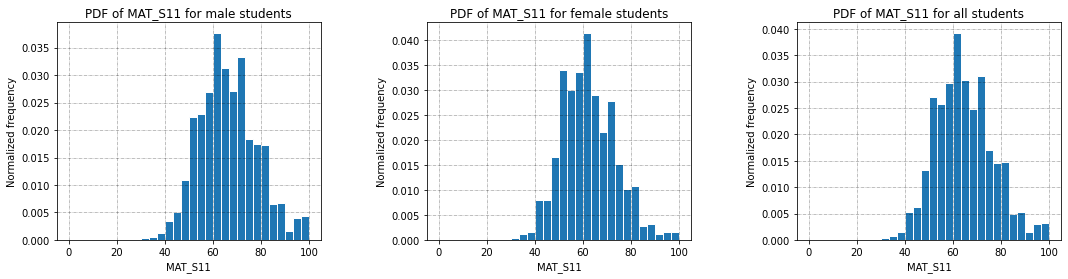

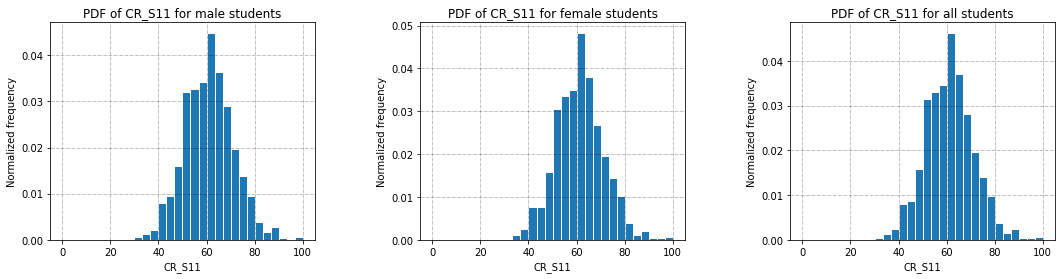

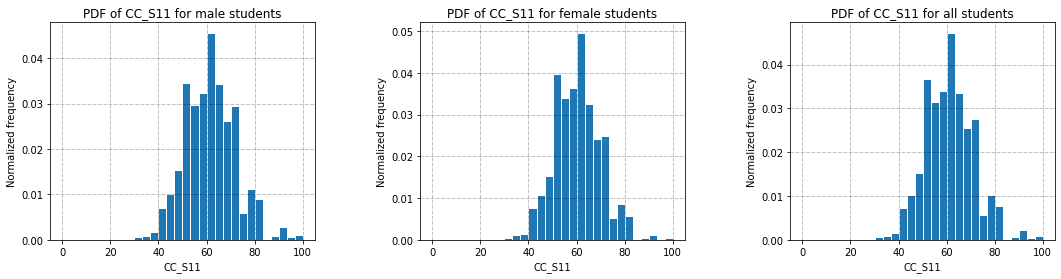

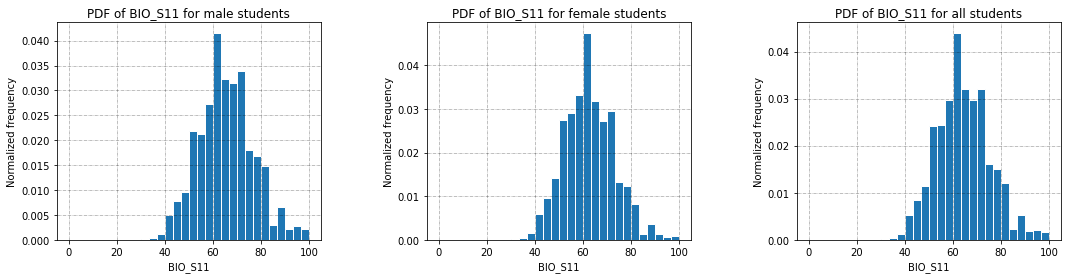

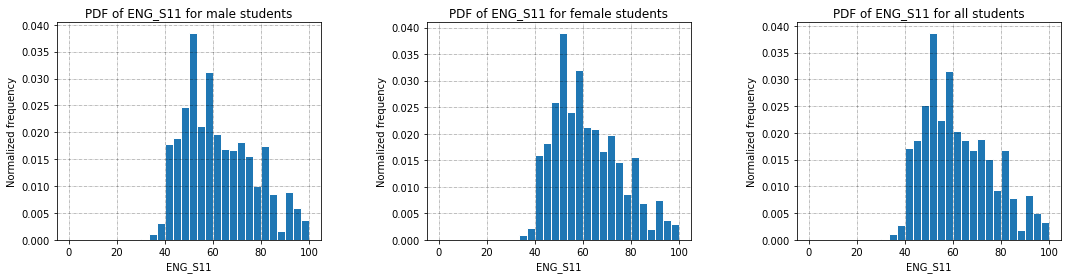

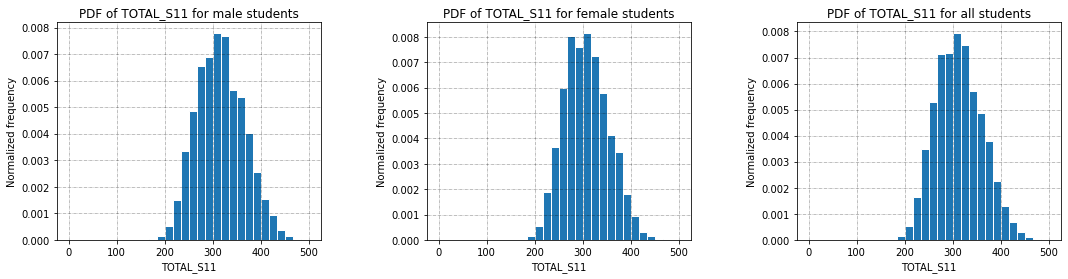

In [11]:
n_bins = 30

for i in range(len(subjects)-1):
  fig, axs = plt.subplots(1, 3, figsize =(18, 4))
  axs[0].grid(b = True, color ='black', linestyle ='-.', linewidth = 0.5, alpha = 0.5)  
  N, bins, patches = axs[0].hist(data_male[subjects[i]], bins = n_bins, range=[0, 100], density=True, cumulative=False, edgecolor = 'white')     
  axs[0].set_xlabel(subjects[i])
  axs[0].set_ylabel("Normalized frequency")
  axs[0].set_title("PDF of "+ subjects[i] +" for male students") 

  axs[1].grid(b = True, color ='black', linestyle ='-.', linewidth = 0.5, alpha = 0.5)  
  N, bins, patches = axs[1].hist(data_female[subjects[i]], bins = n_bins, range=[0, 100], density=True, cumulative=False, edgecolor = 'white')     
  axs[1].set_xlabel(subjects[i])
  axs[1].set_ylabel("Normalized frequency")
  axs[1].set_title("PDF of "+ subjects[i] +" for female students") 
  fig.subplots_adjust(wspace=0.4)

  axs[2].grid(b = True, color ='black', linestyle ='-.', linewidth = 0.5, alpha = 0.5)  
  N, bins, patches = axs[2].hist(data[subjects[i]], bins = n_bins, range=[0, 100], density=True, cumulative=False, edgecolor = 'white')     
  axs[2].set_xlabel(subjects[i])
  axs[2].set_ylabel("Normalized frequency")
  axs[2].set_title("PDF of "+ subjects[i] +" for all students") 
  fig.subplots_adjust(wspace=0.4)

  plt.show()
  print('\n\n')

fig, axs = plt.subplots(1, 3, figsize =(18, 4))
axs[0].grid(b = True, color ='black', linestyle ='-.', linewidth = 0.5, alpha = 0.5)  
N, bins, patches = axs[0].hist(data_male[total], bins = n_bins, range=[0, 500], density=True, cumulative=False, edgecolor = 'white')
axs[0].set_xlabel(total)
axs[0].set_ylabel("Normalized frequency")
axs[0].set_title("PDF of "+ total +" for male students")

axs[1].grid(b = True, color ='black', linestyle ='-.', linewidth = 0.5, alpha = 0.5)  
N, bins, patches = axs[1].hist(data_female[total], bins = n_bins, range=[0, 500], density=True, cumulative=False, edgecolor = 'white')     
axs[1].set_xlabel(total)
axs[1].set_ylabel("Normalized frequency")
axs[1].set_title("PDF of "+ total +" for female students") 
fig.subplots_adjust(wspace=0.4)

axs[2].grid(b = True, color ='black', linestyle ='-.', linewidth = 0.5, alpha = 0.5)  
N, bins, patches = axs[2].hist(data[total], bins = n_bins, range=[0, 500], density=True, cumulative=False, edgecolor = 'white')     
axs[2].set_xlabel(total)
axs[2].set_ylabel("Normalized frequency")
axs[2].set_title("PDF of "+ total +" for all students") 
fig.subplots_adjust(wspace=0.4)
plt.show()

### (f) &nbsp; KS Test for Checking Normal Distribution
### &nbsp; &emsp; $\alpha$=0.05

In [12]:
p_value = []
alpha = 0.05
for sub in subjects:
  normal_data = np.random.normal(np.array(data[sub].mean()), np.array(data[sub].std()), len(data[sub]))
  stat, pval = ks_2samp(data[sub], normal_data)
  p_value.append([sub, "{:.5f}".format(pval), '❌' if pval < alpha else '✔️'])

p_value_df = pd.DataFrame(p_value, columns=['Subject', 'p-value', 'Hypothesis'])
p_value_df

,Subject,p-value,Hypothesis
0,MAT_S11,0.00000,❌
1,CR_S11,0.00000,❌
2,CC_S11,0.00000,❌
3,BIO_S11,0.00000,❌
4,ENG_S11,0.00000,❌
5,TOTAL_S11,0.00000,❌


### (g) Scatter Plot

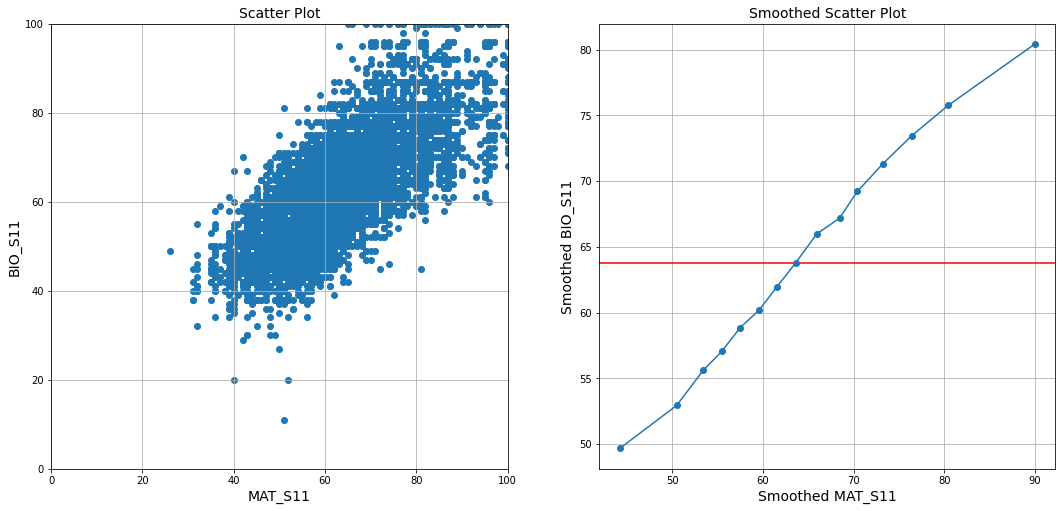

In [25]:
# Create new dataframe consisting of two columns name_X, name_y
def extract_from_dataset(dataset, name_X, name_Y):
    return dataset[[name_X, name_Y]].copy()

def intervals_d(df, n_slices, name_X):
    out, bins = pd.qcut(df[name_X], n_slices, retbins = True)
    intervals = [pd.Interval(left = bins[i], right = bins[i+1], closed = 'right')
                 for i in range(len(bins) - 1)]
    intervals_dict = dict(zip(range(1, len(bins)), intervals))
    return intervals_dict

# Check whether x belongs to an interval from intervals dictionary                
def set_interval(x, intervals_dict):
    for k,v in intervals_dict.items():
        if x in v:
            return k

# Smooth X and Y using mean values
def smooth(df, name_X, name_Y, intervals_dict):
    df['X_Interval'] = df[name_X].apply(lambda x: set_interval(x, intervals_dict))
    smoothed_df = df.groupby(by = 'X_Interval').apply(np.mean)[[name_X, name_Y]]
    smoothed_df = smoothed_df.reset_index()
    smoothed_df['X_Interval'] = smoothed_df['X_Interval'].astype(dtype = 'int32')
    df = df[[name_X, name_Y]]
    return smoothed_df

# Plot raw and smoothed scatterplots
def scatterplots(df, name_X, name_Y, n_slices):
    fig = plt.figure(figsize=(18, 18))
    
    # Raw scatterplot
    ax = fig.add_subplot(221)
    plt.grid()
    plt.scatter(df[name_X], df[name_Y])
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    plt.xlabel(name_X, fontsize=14)
    plt.ylabel(name_Y, fontsize=14)
    plt.title('Scatter Plot', fontsize=14)
    
    # Smoothed scatterplot
    ax = fig.add_subplot(222)
    intervals_dict = intervals_d(df, n_slices, name_X)
    smoothed_df = smooth(df, name_X, name_Y, intervals_dict)
    Xmin = 0
    Xmax = 100
    ymin = 0
    ymax = 100
    ymedial = smoothed_df[name_Y].median()
    plt.grid()
    plt.plot(smoothed_df[name_X], smoothed_df[name_Y], marker='o')
    # ax.set_xlim(0, 100)
    # ax.set_ylim(0, 100)
    # ax.set_xbound(lower=0.0, upper=100)
    # ax.set_ybound(lower=0.0, upper=100)
    plt.xlabel('Smoothed ' + name_X, fontsize=14)
    plt.ylabel('Smoothed ' + name_Y, fontsize=14)
    plt.axis('tight')
    plt.title('Smoothed Scatter Plot', fontsize=14)
    
    #Draw medial line
    plt.hlines(ymedial, Xmin, Xmax, color='r')

    plt.show()

temp_df = extract_from_dataset(data, maths, biology)
scatterplots(temp_df, maths, biology, n_slices = 15)

### (h) Linear, Quadratic and Cubic Regression

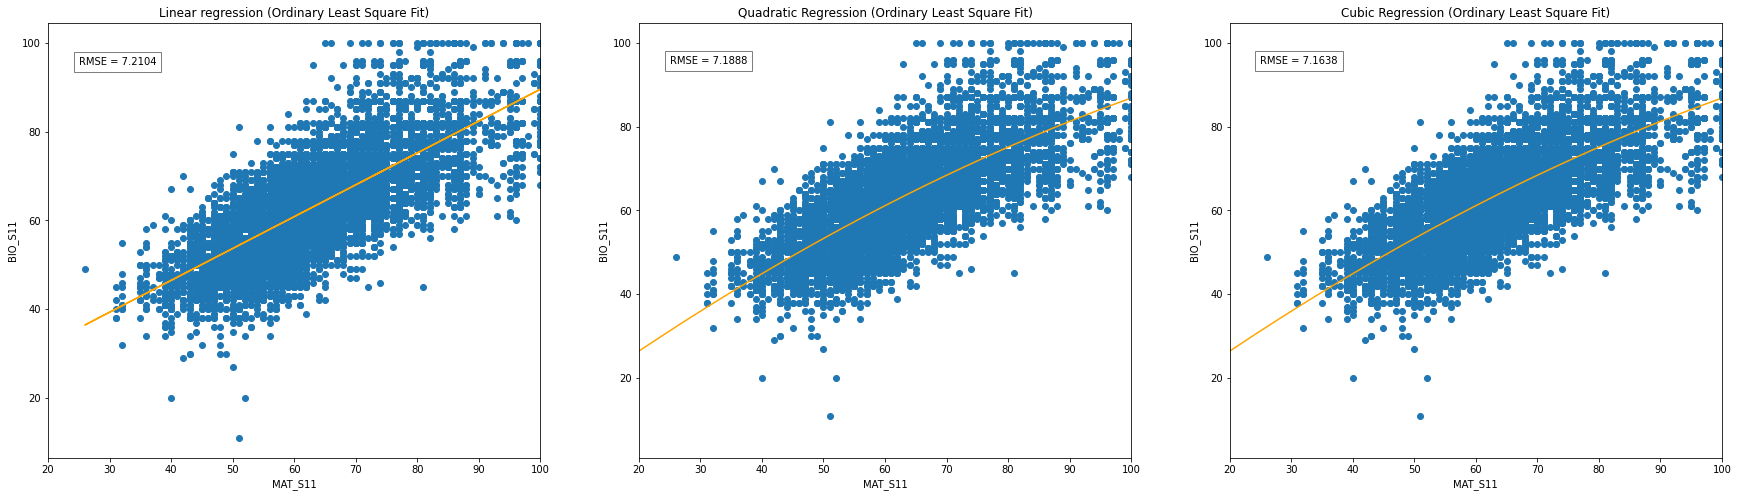

In [14]:
number_eng = ['0', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten', 'Eleven', 'Twelve or more']
people_eng_array = data['PEOPLE_HOUSE']
number_of_people_in_house = []

for people in people_eng_array:
  if people == 'Nueve':
    people = 'Nine'
  elif people == 'Once':
    people = 'One'
  number_of_people_in_house.append(number_eng.index(people))

fig = plt.figure(figsize=(30, 8))

# Polynomial Regression With Degree = 1
z1 = np.polyfit(data[maths], data[biology], 1)
x1 = data[maths]
y_pred = z1[1] + z1[0]*x1
rmse = math.sqrt(mean_squared_error(data[biology], y_pred))

ax = fig.add_subplot(131)
plt.plot(x1,y_pred,color='orange')
plt.scatter(data[maths], data[biology], marker='o')
plt.xlim(20, 100)
plt.xlabel(maths)
plt.ylabel(biology)
ax.text(25, 95, 'RMSE = ' + str(round(rmse, 4)), bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
plt.title("Linear regression (Ordinary Least Square Fit)") 

# Polynomial Regression With Degree = 2
z2 = np.polyfit(data[maths], data[biology], 2)
x1 = data[maths]
y_pred = z2[2] + z2[1]*x1 + z2[0]*x1*x1
rmse = math.sqrt(mean_squared_error(data[biology], y_pred))

x1 = np.arange(0, 100, 0.5)
y_pred = z2[2] + z2[1]*x1 + z2[0]*x1*x1

ax = fig.add_subplot(132)
plt.plot(x1, y_pred, color='orange')
plt.scatter(data[maths], data[biology], marker='o')
plt.xlim(20, 100)
plt.xlabel(maths)
plt.ylabel(biology)
plt.title("Quadratic Regression (Ordinary Least Square Fit)") 
ax.text(25, 95, 'RMSE = ' + str(round(rmse, 4)), bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})

# Polynomial Regression With Degree = 3
z3 = np.polyfit(data[maths], data[biology], 3)
x1 = data[maths]
y_pred = z3[3] + z3[2]*x1 + z3[1]*x1*x1 + z3[0]*x1*x1*x1
rmse = math.sqrt(mean_squared_error(data[biology], y_pred))

x1 = np.arange(0, 100, 0.5)
y_pred = z2[2] + z2[1]*x1 + z2[0]*x1*x1

ax = fig.add_subplot(133)
plt.plot(x1, y_pred, color='orange')
plt.scatter(data[maths], data[biology], marker='o')
plt.xlim(20, 100)
plt.xlabel(maths)
plt.ylabel(biology)
plt.title("Cubic Regression (Ordinary Least Square Fit)") 
ax.text(25, 95, 'RMSE = ' + str(round(rmse, 4)), bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
plt.show()

### (i) Principal Component Analysis

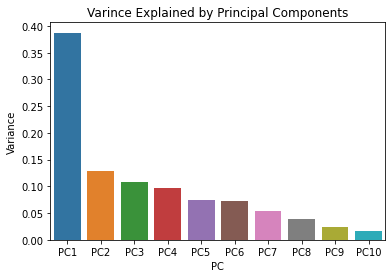

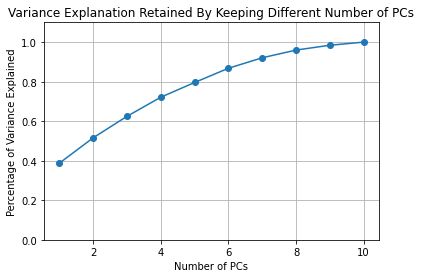

In [34]:
pca_df = data[['INTERNET', 'TV', 'COMPUTER', 'WASHING_MCH', 'MIC_OVEN', 'CAR', 'DVD', 'FRESH', 'PHONE', 'MOBILE']]

mymap = {'No':0, 'Yes':1}
pca_df = pca_df.applymap(lambda s: mymap.get(s) if s in mymap else s)

feat = ['INTERNET', 'TV', 'COMPUTER', 'WASHING_MCH', 'MIC_OVEN', 'CAR', 'DVD', 'FRESH', 'PHONE', 'MOBILE']
x = pca_df.loc[:, feat].values
y = data.loc[:,['TOTAL_S11']].values

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
plt.figure()
df = pd.DataFrame({'Variance':pca.explained_variance_ratio_, 'PC':['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})
sns.barplot(x='PC', y='Variance', data=df)
plt.title('Varince Explained by Principal Components')
plt.show()

var = [pca.explained_variance_ratio_[0]]
for i in range(1, len(pca.explained_variance_ratio_)):
  var.append(var[i-1] + pca.explained_variance_ratio_[i])

# df = pd.DataFrame({'Percentage of Variance Explained': var, 'Number of PCs':['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']})
# sns.barplot(x='Number of PCs', y='Percentage of Variance Explained', data=df)

temp = [1, 2, 3, 4, 5 ,6 ,7 ,8 , 9, 10]
plt.figure()
plt.plot(temp, var, marker='o')
plt.xlabel('Number of PCs')
plt.ylabel('Percentage of Variance Explained')
plt.title('Variance Explanation Retained By Keeping Different Number of PCs')
plt.grid()
plt.ylim(0, 1.1)
plt.show()

### (j) Loading Plot for Analyzing Effect of Features on PCs

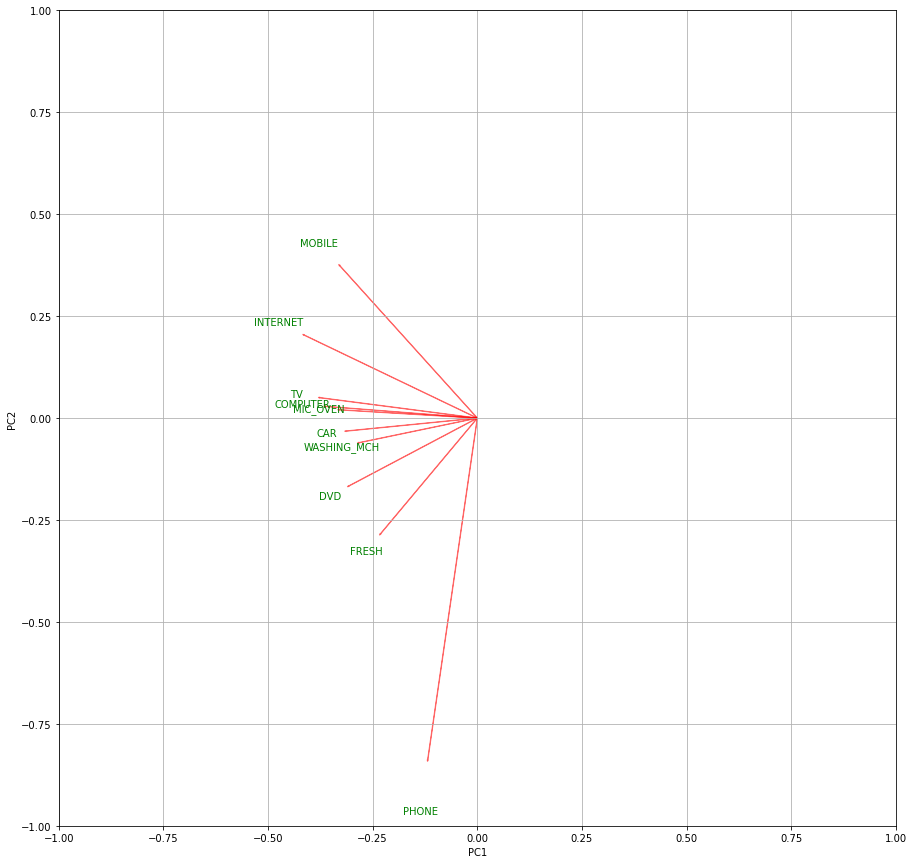

In [18]:
X = pca_df
y = data[total]

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca = PCA()
x_new = pca.fit_transform(X)

plt.figure(figsize=(15, 15))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    # plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, pca_df.columns[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

### (k) Analyzing Effect of Parents' Education on Student's Score

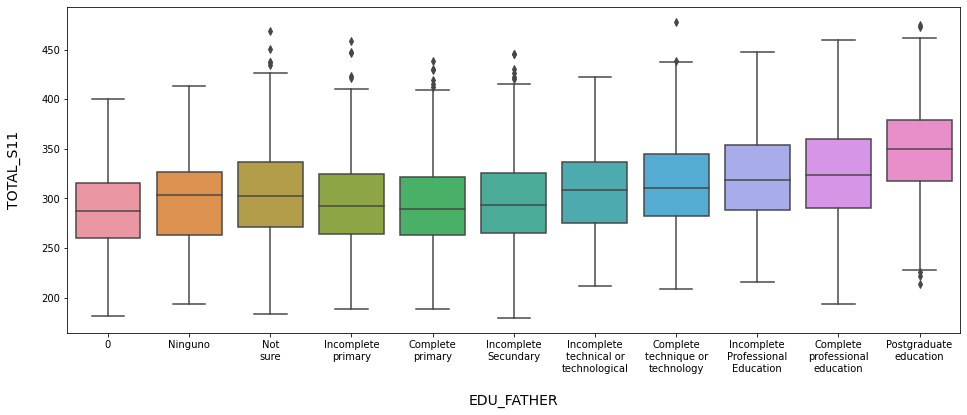

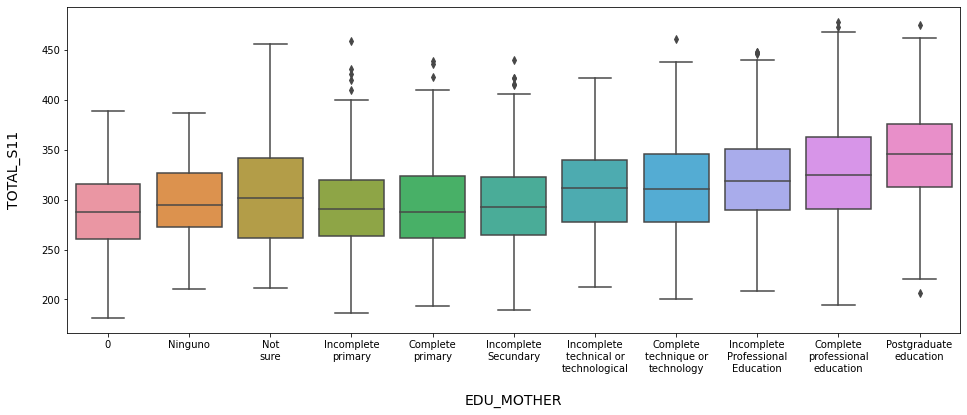

In [17]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x=data["EDU_FATHER"], y=data["TOTAL_S11"], order=['0', 'Ninguno', 'Not sure', 'Incomplete primary ', 'Complete primary ', 'Incomplete Secundary', 'Incomplete technical or technological', 'Complete technique or technology', 'Incomplete Professional Education', 'Complete professional education', 'Postgraduate education'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=270)
ax.set_xlabel('\nEDU_FATHER', fontsize=14)
ax.set_ylabel('TOTAL_S11\n', fontsize=14)

arr = ax.get_xticklabels()
tick = []
for edu in arr:
  txt = edu.get_text().split()
  temp = txt[0]
  for i in range(1, len(txt)):
    if txt[i] == 'or':
      temp = temp + ' ' + txt[i]
    else:
      temp = temp + '\n' + txt[i]
  tick.append(temp)

ax.set_xticklabels(tick, rotation=0)
plt.show()

fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x=data["EDU_MOTHER"], y=data["TOTAL_S11"], order=['0', 'Ninguno', 'Not sure', 'Incomplete primary ', 'Complete primary ', 'Incomplete Secundary', 'Incomplete technical or technological', 'Complete technique or technology', 'Incomplete Professional Education', 'Complete professional education', 'Postgraduate education'])

print('\n\n\n\n\n')

arr = ax.get_xticklabels()
tick = []
for edu in arr:
  txt = edu.get_text().split()
  temp = txt[0]
  for i in range(1, len(txt)):
    if txt[i] == 'or':
      temp = temp + ' ' + txt[i]
    else:
      temp = temp + '\n' + txt[i]
  tick.append(temp)

ax.set_xticklabels(tick, rotation=0)
ax.set_xlabel('\nEDU_MOTHER', fontsize=14)
ax.set_ylabel('TOTAL_S11\n', fontsize=14)
plt.show()